In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.utils import resample
import os

In [2]:
# Llegim el nom dels nodes.
# Obrim el fitxer '.txt' i  llegim les linies.
with open('mindboggle_ROIs_class.txt', 'r') as file:
    header_line = file.readline().strip()

    data = []

    for line in file:
        values = line.strip().split('\t')
        data.append(values)

dict_data = dict()
for i in data:
    node=int(i[0])-1
    dict_data[str(node)] = i[1]
#dict_data

### Global Metrics

In [3]:
# Read CSV File.
#file_metrics = 'table_metrics_functional.csv'
#file_metrics = 'table_metrics_structural.csv'
file_metrics = 'table_metrics_morphological.csv'

df = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,29.995191,0.517193,0.269625,0.080985,0.289474,0.316550,0.439617,1.710526,0,25.565075
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,28.897686,0.507368,0.282316,0.049823,1.184211,0.316594,0.440758,1.289474,0,25.373217
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,30.030545,0.530877,0.272717,0.056606,1.552632,0.325322,0.441069,2.223684,0,26.086817
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,29.008766,0.529123,0.272017,0.051155,0.750000,0.325336,0.441252,1.289474,0,25.941776
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,29.486938,0.518596,0.273170,0.068939,0.000000,0.313070,0.439412,1.289474,0,25.795772


In [4]:
print(f"Connexions MS: {np.mean(list(df[df['controls_ms'] == 1]['edges']))}")
print(f"Connexions HV: {np.mean(list(df[df['controls_ms'] == 0]['edges']))}")

Connexions MS: 1955.4424235213846
Connexions HV: 1958.0075244186992


* Implementa la imputació de valors nuls per assegurar-te un bon anàlisi davant les dades incompletes.

In [5]:
# Imputació de valors null
# Check which columns has null values.
for variable in df.columns:
    if df[variable].isna().any():
        print(f"Column {variable} needs imputation in NULL values.")


Column Unnamed_0 needs imputation in NULL values.
Column redcap_event_name needs imputation in NULL values.
Column age needs imputation in NULL values.
Column sex needs imputation in NULL values.
Column dd needs imputation in NULL values.
Column mstype needs imputation in NULL values.
Column dmd needs imputation in NULL values.
Column edss needs imputation in NULL values.
Column uGMSSS needs imputation in NULL values.
Column oGMSSS needs imputation in NULL values.
Column sdmt needs imputation in NULL values.
Column sdmtz needs imputation in NULL values.
Column pasat needs imputation in NULL values.
Column zpasat needs imputation in NULL values.
Column zverbalmemory needs imputation in NULL values.
Column zvisualmemory needs imputation in NULL values.
Column zattention needs imputation in NULL values.
Column zfluency needs imputation in NULL values.
Column zglobal needs imputation in NULL values.
Column FA needs imputation in NULL values.
Column GM needs imputation in NULL values.
Colum

In [6]:
# Summary of all columns
df.describe()

,Var1,Unnamed_0,controls_ms,age,sex,dd,mstype,dmd,edss,uGMSSS,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
count,265.000000,165.000000,265.000000,165.000000,165.000000,165.000000,165.000000,146.000000,165.000000,147.000000,...,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.0,265.000000
mean,132.000000,82.000000,0.554717,46.161529,0.278788,14.110788,0.060606,2.527397,2.369697,3.031156,...,29.852879,0.524834,0.277480,0.064134,0.617378,0.321251,0.440000,1.699553,0.0,25.744534
std,76.643112,47.775517,0.497937,10.602227,0.449768,10.051942,0.591577,3.167062,1.802689,2.008814,...,0.564401,0.008832,0.006344,0.009992,0.502943,0.005401,0.003856,0.346793,0.0,0.301012
min,0.000000,0.000000,0.000000,22.660000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.490000,...,28.753385,0.425614,0.235245,0.029354,0.000000,0.261784,0.380796,1.289474,0.0,22.924718
25%,66.000000,41.000000,0.000000,38.210000,0.000000,7.750000,0.000000,0.000000,1.500000,1.415000,...,29.498904,0.522456,0.275339,0.057818,0.263158,0.319444,0.439712,1.289474,0.0,25.685699
50%,132.000000,82.000000,1.000000,46.330000,0.000000,12.400000,0.000000,1.000000,2.000000,2.530000,...,29.745216,0.525614,0.278008,0.063802,0.539474,0.322339,0.440279,1.710526,0.0,25.777952
75%,198.000000,123.000000,1.000000,53.840000,1.000000,19.600000,0.000000,4.750000,3.000000,4.395000,...,30.097220,0.529123,0.280805,0.069665,0.934211,0.324094,0.440916,1.881579,0.0,25.870432
max,264.000000,164.000000,1.000000,72.220000,1.000000,46.130000,2.000000,14.000000,7.500000,9.290000,...,32.792963,0.541754,0.294828,0.093040,3.250000,0.329854,0.442567,2.447368,0.0,26.248981


In [7]:
# Select the required columns.
columns_x = ['age', 'sex', 'edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity', 'transitivity', 'strength']

# Fill missing values using the mean().
#df.fillna(df.mean(), inplace=True)

X = df[columns_x]
X.head()

,age,sex,edges,degree,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,51.53,1.0,1942.945733,19.394737,29.995191,0.517193,0.269625,0.080985,0.289474,0.316550,0.439617,1.710526,0,25.565075
1,58.06,0.0,1928.364460,19.026316,28.897686,0.507368,0.282316,0.049823,1.184211,0.316594,0.440758,1.289474,0,25.373217
2,60.78,1.0,1982.598126,19.907895,30.030545,0.530877,0.272717,0.056606,1.552632,0.325322,0.441069,2.223684,0,26.086817
3,37.95,0.0,1971.574999,19.842105,29.008766,0.529123,0.272017,0.051155,0.750000,0.325336,0.441252,1.289474,0,25.941776
4,52.64,0.0,1960.478642,19.447368,29.486938,0.518596,0.273170,0.068939,0.000000,0.313070,0.439412,1.289474,0,25.795772


In [8]:
y = df['controls_ms']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: controls_ms, dtype: int64

In [9]:
df_HV = df[df['controls_ms'] == 0]
df_MS = df[df['controls_ms'] == 1]


In [10]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics = list()
list_bonferroni_correction = dict()
num_matrius = len(df)

for metric in ['edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity','transitivity', 'strength']:
    dades_HV = df[df['controls_ms'] == 0][metric]
    dades_MS = df[df['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction[metric] = pval_corrected   
        list_significative_metrics.append(metric)
        

Metric: max_degree pvalue: 0.010784895699215567


/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [11]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction.keys())

['max_degree']

In [12]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction.keys()):
    mean_MS_ = np.mean(df_MS[metric])
    std_MS_ = np.std(df_MS[metric])
    
    mean_HV_ = np.mean(df_MS[metric])
    std_HV_ = np.std(df_MS[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - max_degree: MS: 29.974935811020877 (0.6085786641054649), HV: 29.974935811020877 (0.6085786641054649), Pvalue: 0.010784895699215567 



In [13]:
#list_significative_metrics.append('sex')
#list_significative_metrics.append('age')

# Llistat a utilitzar per aplicar models ML.
print(list(list_significative_metrics))

['max_degree']


Training set - Features: (212, 1), Labels: (212,)
Testing set - Features: (53, 1) Labels: (53,)


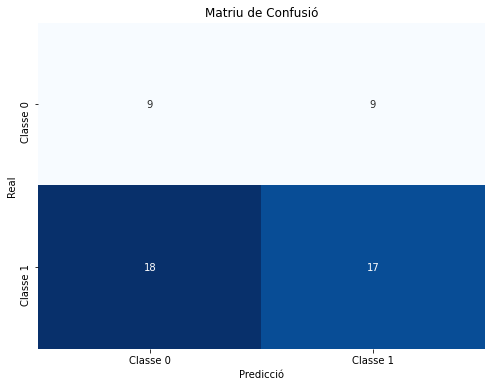

Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40        18
           1       0.65      0.49      0.56        35

    accuracy                           0.49        53
   macro avg       0.49      0.49      0.48        53
weighted avg       0.54      0.49      0.50        53



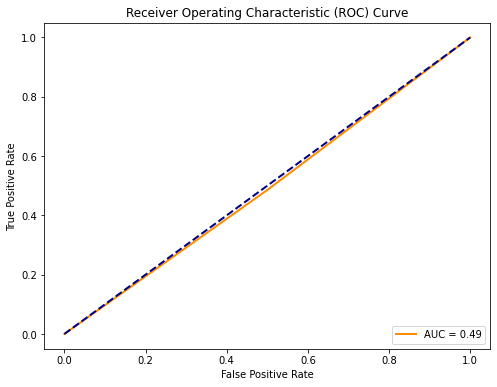

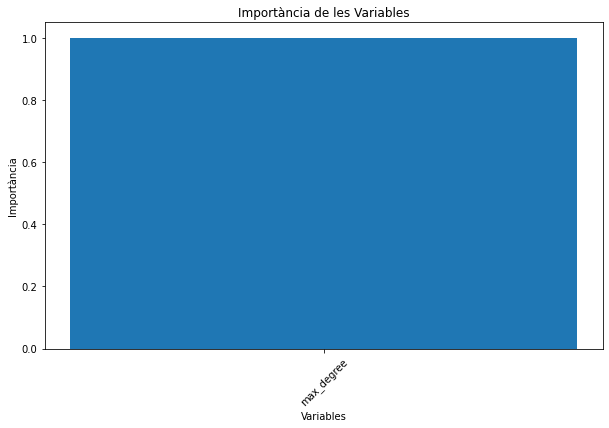


Scores de Accuracy RFC: [0.54716981 0.58490566 0.49056604 0.52830189 0.62264151]
Mitjana Accuracy RFC: 0.5547169811320755


In [15]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_RFC, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy RFC:", cv_accuracy_scores)
print(f"Mitjana Accuracy RFC: {np.mean(cv_accuracy_scores)}")

* **Global: Support Vector Machine**

Training set - Features: (212, 1), Labels: (212,)
Testing set - Features: (53, 1) Labels: (53,)


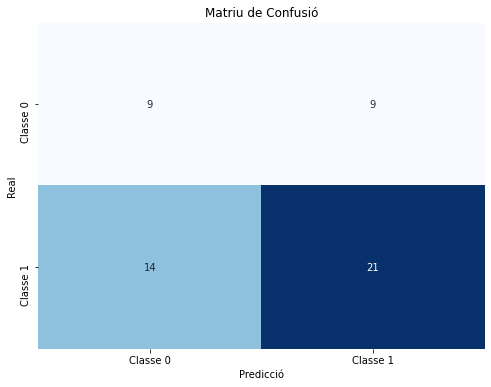

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.50      0.44        18
           1       0.70      0.60      0.65        35

    accuracy                           0.57        53
   macro avg       0.55      0.55      0.54        53
weighted avg       0.60      0.57      0.58        53



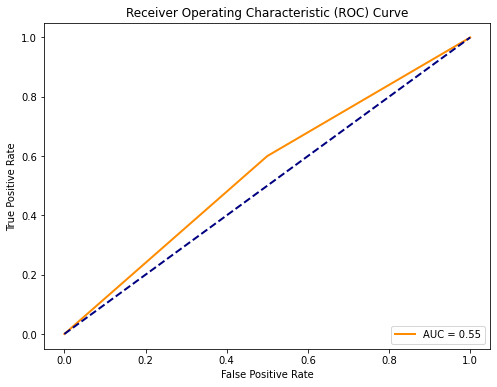

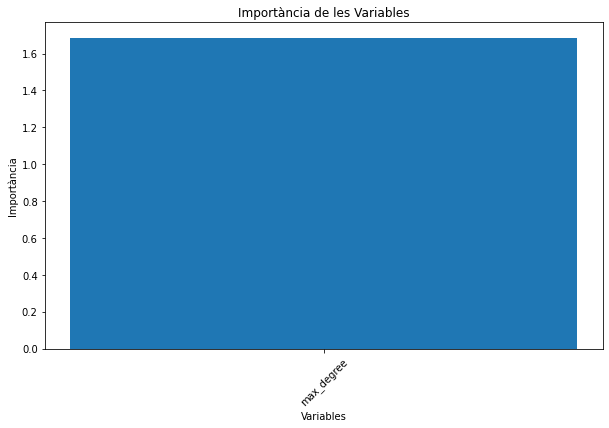


Scores de Accuracy SVM: [0.62264151 0.50943396 0.56603774 0.54716981 0.64150943]
Mitjana Accuracy SVM: 0.5773584905660377


In [16]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_SVM, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy SVM:", cv_accuracy_scores)
print(f"Mitjana Accuracy SVM: {np.mean(cv_accuracy_scores)}")


* **Global: KNN**

Training set - Features: (212, 1), Labels: (212,)
Testing set - Features: (53, 1) Labels: (53,)


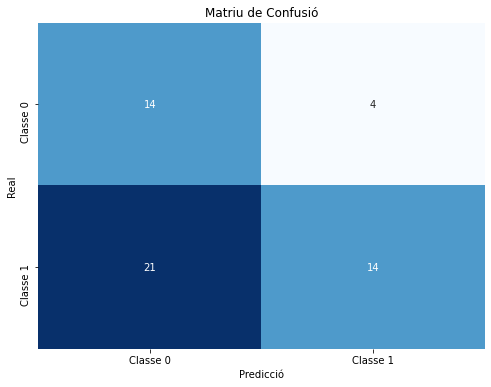

Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.78      0.53        18
           1       0.78      0.40      0.53        35

    accuracy                           0.53        53
   macro avg       0.59      0.59      0.53        53
weighted avg       0.65      0.53      0.53        53



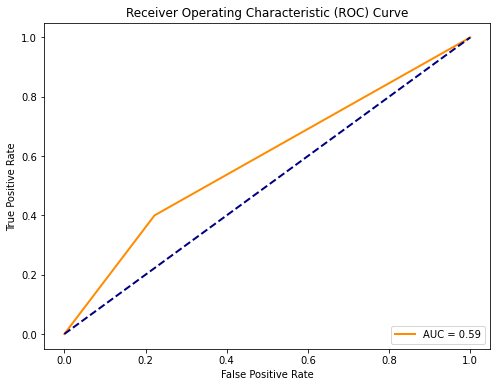


Scores de Accuracy KNN: [0.52830189 0.49056604 0.52830189 0.58490566 0.69811321]
Mitjana Accuracy KNN: 0.5660377358490567


In [17]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_KNN, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy KNN:", cv_accuracy_scores)
print(f"Mitjana Accuracy KNN: {np.mean(cv_accuracy_scores)}")

* **Global: Logistic Regression**

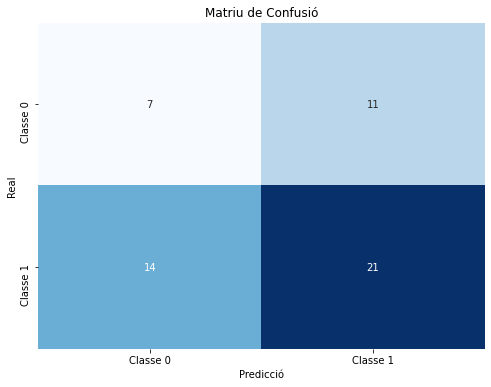

Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.39      0.36        18
           1       0.66      0.60      0.63        35

    accuracy                           0.53        53
   macro avg       0.49      0.49      0.49        53
weighted avg       0.55      0.53      0.54        53



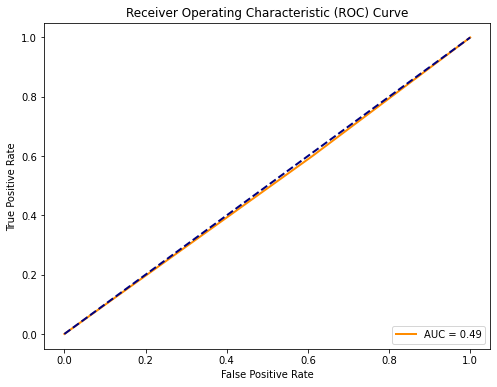

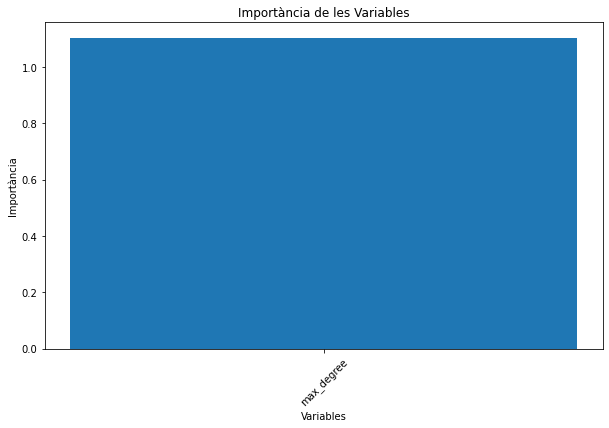


Scores de Accuracy LR: [0.58490566 0.50943396 0.52830189 0.56603774 0.64150943]
Mitjana Accuracy LR: 0.5660377358490566


In [18]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_LR, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy LR:", cv_accuracy_scores)
print(f"Mitjana Accuracy LR: {np.mean(cv_accuracy_scores)}")

* **Global: Gaussian Naive Bayes**

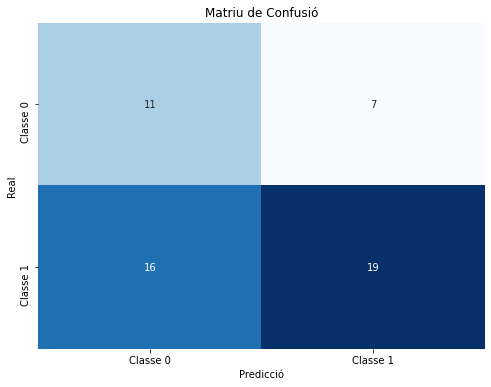

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.61      0.49        18
           1       0.73      0.54      0.62        35

    accuracy                           0.57        53
   macro avg       0.57      0.58      0.56        53
weighted avg       0.62      0.57      0.58        53



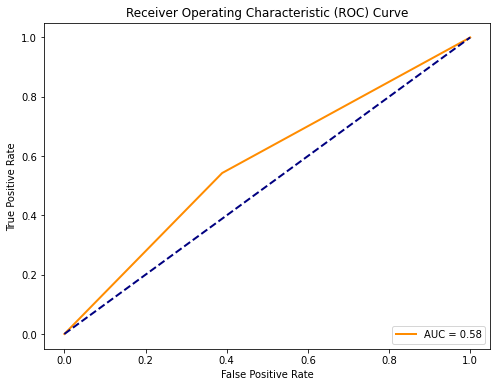


Scores de Accuracy GNB: [0.54716981 0.50943396 0.62264151 0.67924528 0.67924528]
Mitjana Accuracy GNB: 0.6075471698113206


In [19]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_GNB, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy GNB:", cv_accuracy_scores)
print(f"Mitjana Accuracy GNB: {np.mean(cv_accuracy_scores)}")

### Local Metrics

In [20]:
# Read CSV File.
#file_metrics = 'table_metrics_local_functional.csv'
#file_metrics = 'table_metrics_local_structural.csv'
file_metrics = 'table_metrics_local_morphological.csv'

df_local = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df_local.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,modularity_66,modularity_67,modularity_68,modularity_69,modularity_70,modularity_71,modularity_72,modularity_73,modularity_74,modularity_75
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,2,2,2,2,2,2,2,2,2,2
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,1,1,1,1,1,1,1,1,1,1
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,2,2,2,2,2,2,2,2,2,2
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,1,1,1,1,1,1,1,1,1,1
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,1,1,1,1,1,1,1,1,1,1


In [21]:
# Obtenim el llistat de mètriques locals.
# Get index of 'degree_0'.
index_of_degree0 = df_local.columns.get_loc('degree_0')
list_local_metrics = list(df_local.columns)[index_of_degree0:]


In [22]:
df_MS_local = df_local[df_local['controls_ms'] == 1]
df_HV_local = df_local[df_local['controls_ms'] == 0]

In [23]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics_local = list()
list_bonferroni_correction_local = dict()
num_matrius = len(df)

for metric in list_local_metrics:
    dades_HV = df_local[df_local['controls_ms'] == 0][metric]
    dades_MS = df_local[df_local['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction_local[metric] = pval_corrected   
        list_significative_metrics_local.append(metric)
        

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: degree_18 pvalue: 3.884119232901606e-10
Metric: degree_19 pvalue: 6.426969276961724e-05
Metric: degree_24 pvalue: 0.0028551063154277872
Metric: degree_25 pvalue: 7.363828987863633e-07
Metric: degree_26 pvalue: 0.004593238421951921
Metric: degree_61 pvalue: 0.0016347251433689164
Metric: degree_65 pvalue: 0.00420119774386099
Metric: degree_71 pvalue: 0.004300831567281851


/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: pager_centr_13 pvalue: 1.7352602074079398e-10
Metric: pager_centr_14 pvalue: 2.1127088870804e-11
Metric: pager_centr_21 pvalue: 7.118639757666647e-09
Metric: pager_centr_22 pvalue: 8.066555922275904e-10
Metric: pager_centr_35 pvalue: 5.805719684393697e-05
Metric: pager_centr_54 pvalue: 0.004488656790264581
Metric: pager_centr_66 pvalue: 0.0008788455959941922


/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: clust_coef_0 pvalue: 0.0002964711918213016
Metric: clust_coef_1 pvalue: 4.877355632464444e-07
Metric: clust_coef_4 pvalue: 0.011402786597898484
Metric: clust_coef_16 pvalue: 0.03683006120687401
Metric: clust_coef_33 pvalue: 0.0007069236356928312
Metric: clust_coef_51 pvalue: 0.02272699030952976
Metric: clust_coef_57 pvalue: 0.028315833175750496


/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/guillem/.local/lib/python3.6/site-packages/scipy/stats

Metric: clust_coef_64 pvalue: 5.440592370605174e-07
Metric: clust_coef_66 pvalue: 0.03167839990612148
Metric: local_ef_0 pvalue: 0.0008228190963143918
Metric: local_ef_1 pvalue: 8.847433593782794e-06
Metric: local_ef_9 pvalue: 0.03541435041680425
Metric: local_ef_13 pvalue: 0.006759317879941504
Metric: local_ef_14 pvalue: 7.655872619368782e-07
Metric: local_ef_31 pvalue: 0.0005863008401905649
Metric: local_ef_32 pvalue: 6.9914042971198235e-09
Metric: local_ef_34 pvalue: 2.2562919904038237e-05
Metric: local_ef_35 pvalue: 2.2267190902275252e-05
Metric: local_ef_36 pvalue: 2.6597526669070917e-05
Metric: local_ef_38 pvalue: 0.013717917457377835
Metric: local_ef_39 pvalue: 0.000605073971685204
Metric: local_ef_40 pvalue: 0.04995151230810693
Metric: local_ef_41 pvalue: 1.031022690179187e-05
Metric: local_ef_42 pvalue: 0.0006889431333412884
Metric: local_ef_43 pvalue: 8.86916691476147e-10
Metric: local_ef_45 pvalue: 2.217964554095713e-10
Metric: local_ef_48 pvalue: 2.7239587211965836e-09
Metr

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Metric: strength_36 pvalue: 5.8936529396061246e-06
Metric: strength_40 pvalue: 0.00010751435767650293
Metric: strength_42 pvalue: 0.011562426157733272
Metric: strength_45 pvalue: 0.001617356559438421
Metric: strength_61 pvalue: 0.01794683091334485


In [24]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction_local.keys())

['degree_18',
 'degree_19',
 'degree_24',
 'degree_25',
 'degree_26',
 'degree_61',
 'degree_65',
 'degree_71',
 'pager_centr_13',
 'pager_centr_14',
 'pager_centr_21',
 'pager_centr_22',
 'pager_centr_35',
 'pager_centr_54',
 'pager_centr_66',
 'clust_coef_0',
 'clust_coef_1',
 'clust_coef_4',
 'clust_coef_16',
 'clust_coef_33',
 'clust_coef_51',
 'clust_coef_57',
 'clust_coef_64',
 'clust_coef_66',
 'local_ef_0',
 'local_ef_1',
 'local_ef_9',
 'local_ef_13',
 'local_ef_14',
 'local_ef_31',
 'local_ef_32',
 'local_ef_34',
 'local_ef_35',
 'local_ef_36',
 'local_ef_38',
 'local_ef_39',
 'local_ef_40',
 'local_ef_41',
 'local_ef_42',
 'local_ef_43',
 'local_ef_45',
 'local_ef_48',
 'local_ef_50',
 'local_ef_51',
 'local_ef_52',
 'local_ef_53',
 'local_ef_55',
 'local_ef_56',
 'local_ef_57',
 'local_ef_58',
 'local_ef_59',
 'local_ef_60',
 'local_ef_61',
 'local_ef_62',
 'local_ef_63',
 'local_ef_64',
 'local_ef_66',
 'local_ef_68',
 'local_ef_73',
 'local_ef_74',
 'local_ef_75',
 'stren

In [25]:
len(list_bonferroni_correction_local)

81

In [26]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction_local.keys()):
    mean_MS_ = np.mean(df_MS_local[metric])
    std_MS_ = np.std(df_MS_local[metric])
    
    mean_HV_ = np.mean(df_MS_local[metric])
    std_HV_ = np.std(df_MS_local[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction_local[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - degree_18: MS: 17.537414965986393 (0.8019712859258046), HV: 17.537414965986393 (0.8019712859258046), Pvalue: 3.884119232901606e-10 

Metric - degree_19: MS: 18.462585034013607 (0.6522812802921425), HV: 18.462585034013607 (0.6522812802921425), Pvalue: 6.426969276961724e-05 

Metric - degree_24: MS: 21.35374149659864 (0.6577918233269971), HV: 21.35374149659864 (0.6577918233269971), Pvalue: 0.0028551063154277872 

Metric - degree_25: MS: 21.591836734693878 (0.6033365509834483), HV: 21.591836734693878 (0.6033365509834483), Pvalue: 7.363828987863633e-07 

Metric - degree_26: MS: 21.965986394557824 (0.21555074173816138), HV: 21.965986394557824 (0.21555074173816138), Pvalue: 0.004593238421951921 

Metric - degree_61: MS: 24.156462585034014 (0.7885289867124954), HV: 24.156462585034014 (0.7885289867124954), Pvalue: 0.0016347251433689164 

Metric - degree_65: MS: 24.639455782312925 (0.6166132894489611), HV: 24.639455782312925 (0.616613

* **Local: Random Forest Classifier**

Training set - Features: (212, 81), Labels: (212,)
Testing set - Features: (53, 81) Labels: (53,)


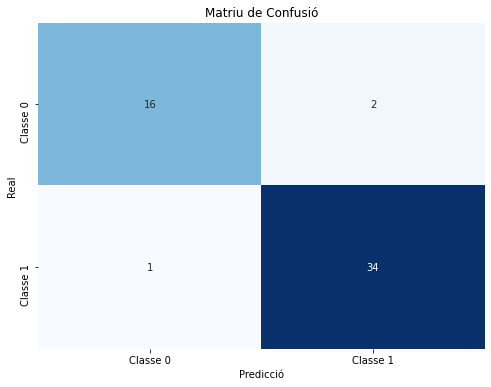

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.94      0.97      0.96        35

    accuracy                           0.94        53
   macro avg       0.94      0.93      0.94        53
weighted avg       0.94      0.94      0.94        53



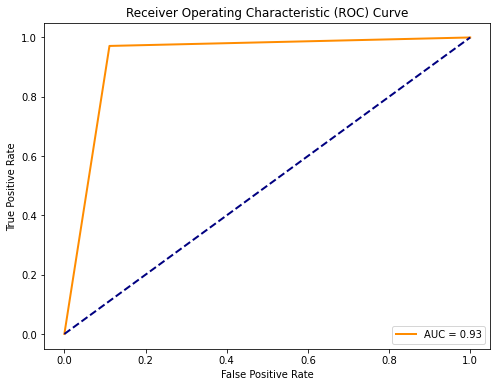

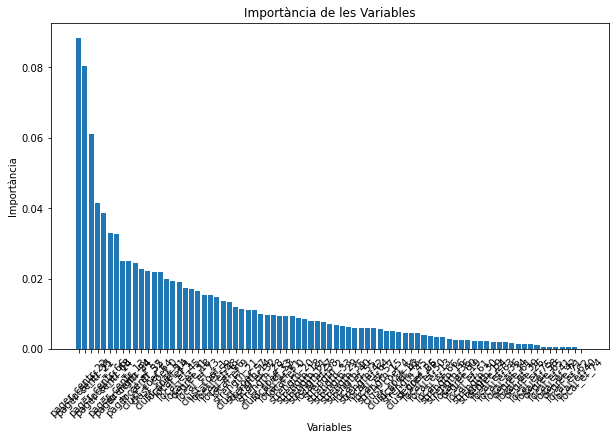


Scores de Accuracy RFC: [0.73584906 0.96226415 0.96226415 1.         1.        ]
Mitjana Accuracy RFC: 0.9320754716981131


In [27]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_RFC, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy RFC:", cv_accuracy_scores)
print(f"Mitjana Accuracy RFC: {np.mean(cv_accuracy_scores)}")

* **Local: Support Vector Machine (SVM)**

Training set - Features: (212, 81), Labels: (212,)
Testing set - Features: (53, 81) Labels: (53,)


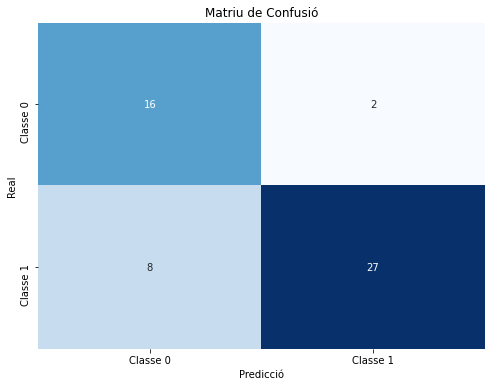

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        18
           1       0.93      0.77      0.84        35

    accuracy                           0.81        53
   macro avg       0.80      0.83      0.80        53
weighted avg       0.84      0.81      0.82        53



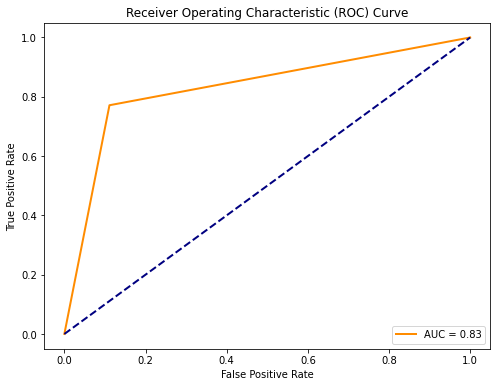

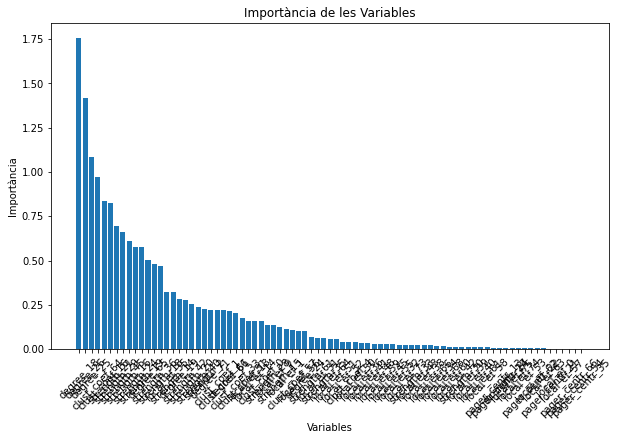


Scores de Accuracy SVM: [0.66037736 0.77358491 0.77358491 0.9245283  0.83018868]
Mitjana Accuracy SVM: 0.7924528301886793


In [28]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_SVM, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy SVM:", cv_accuracy_scores)
print(f"Mitjana Accuracy SVM: {np.mean(cv_accuracy_scores)}")

* **Local: KNN** 

Training set - Features: (212, 81), Labels: (212,)
Testing set - Features: (53, 81) Labels: (53,)


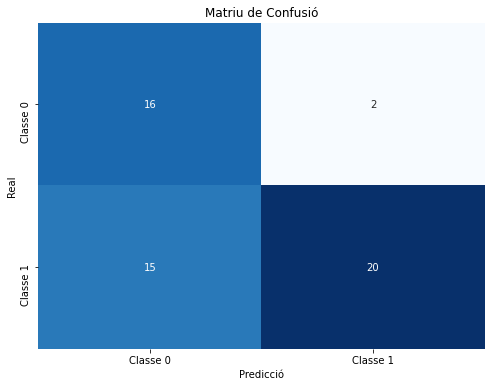

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.89      0.65        18
           1       0.91      0.57      0.70        35

    accuracy                           0.68        53
   macro avg       0.71      0.73      0.68        53
weighted avg       0.78      0.68      0.69        53



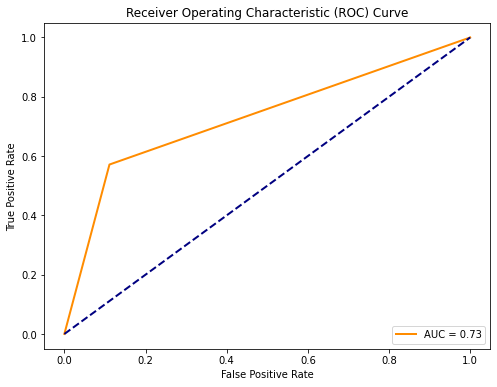


Scores de Accuracy KNN: [0.62264151 0.73584906 0.73584906 0.75471698 0.79245283]
Mitjana Accuracy KNN: 0.7283018867924529


In [29]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_KNN, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy KNN:", cv_accuracy_scores)
print(f"Mitjana Accuracy KNN: {np.mean(cv_accuracy_scores)}")

* **Local: Logistic regression**

/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


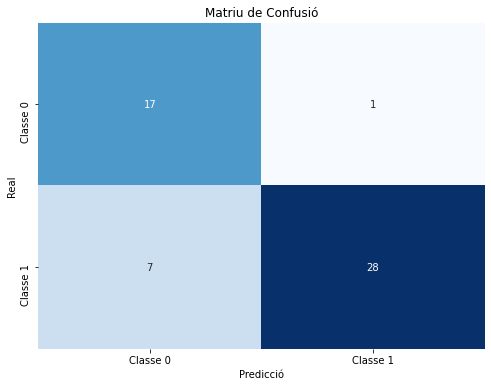

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.97      0.80      0.88        35

    accuracy                           0.85        53
   macro avg       0.84      0.87      0.84        53
weighted avg       0.88      0.85      0.85        53



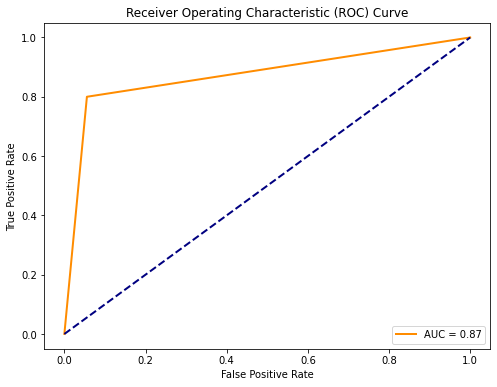

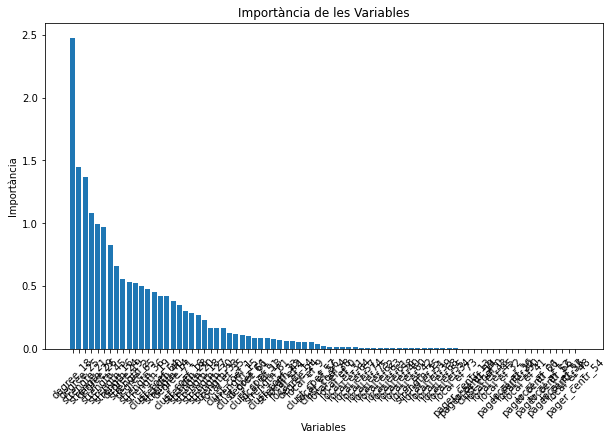

/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Scores de Accuracy LR: [0.64150943 0.83018868 0.83018868 0.9245283  0.86792453]
Mitjana Accuracy LR: 0.8188679245283019


In [30]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_LR, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy LR:", cv_accuracy_scores)
print(f"Mitjana Accuracy LR: {np.mean(cv_accuracy_scores)}")

* **Local: Gaussian Naive Bayes (GNB)**

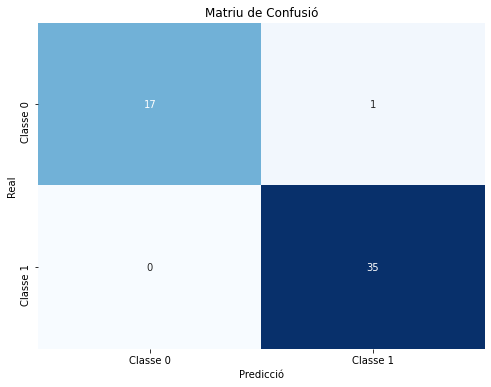

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.97      1.00      0.99        35

    accuracy                           0.98        53
   macro avg       0.99      0.97      0.98        53
weighted avg       0.98      0.98      0.98        53



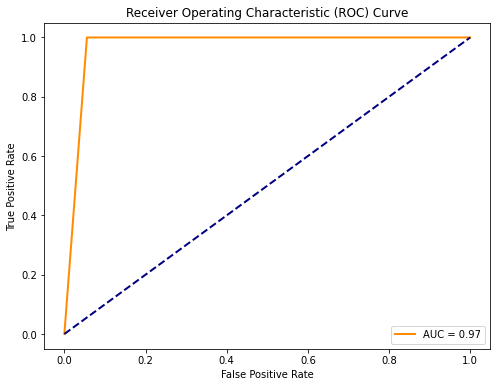


Scores de Accuracy GNB: [0.75471698 0.75471698 1.         0.8490566  0.79245283]
Mitjana Accuracy GNB: 0.8301886792452831


In [31]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print()
from sklearn.model_selection import cross_val_score

# Apliquem la validació creuada amb 5 particiones (5-fold cross-validation)
cv_accuracy_scores = cross_val_score(model_GNB, X_selected_cols, y, cv=5, scoring='accuracy')

# Print dels scores
print("Scores de Accuracy GNB:", cv_accuracy_scores)
print(f"Mitjana Accuracy GNB: {np.mean(cv_accuracy_scores)}")

* Clinical and demographic characteristics of the subjects included in the study.

In [42]:
# Construct Table 1 (Clinic and demographic characteristics of the subjects).

demographic_features_variables = ['sex', 'age']
demographic_features_variables_dict = dict()

for var in demographic_features_variables:
    dades_HV = df_HV[var]
    dades_MS = df_MS[var]

    normalitat_HV = check_normality(dades_HV, 0.05)
    normalitat_MS = check_normality(dades_MS, 0.05)
    
    if normalitat_HV and normalitat_MS:
        _, pvalue_t = ttest_ind(dades_HV, dades_MS)
        #print("pvalue_t:", pvalue_t)
        demographic_features_variables_dict[var] = pvalue_t
    
    # Prova mostres independents.
    else:
        _, pvalue_u = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
        #print("pvalue_u:", pvalue_u)
        demographic_features_variables_dict[var] = pvalue_u
        

In [43]:
# RRMS: 0, SPMS: 1, PPMS (2)
RRMS = df_MS[df_MS['mstype'] == 0].count()['mstype']
SPMS = df_MS[df_MS['mstype'] == 1].count()['mstype']
PPMS = df_MS[df_MS['mstype'] == 2].count()['mstype']

perc_RRMS = RRMS/len(list(df_MS['mstype']))
perc_SPMS = SPMS/len(list(df_MS['mstype']))
perc_PPMS = PPMS/len(list(df_MS['mstype']))


In [44]:
# Obtenim la mitjana de volum de tots els nodes Controls.
# Llegir excel.
volum_df_HV = pd.read_excel('VOLUM_NODES_CONTROLS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_HV = volum_df_HV.mean()
avg_volum_HV = column_avg_HV.mean()
std_volum_HV = column_avg_HV.std()


# Obtenim la mitjana de volum de tots els nodes MS.
# Llegir excel.
volum_df_MS = pd.read_excel('VOLUM_NODES_PATIENTS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_MS = volum_df_MS.mean()
avg_volum_MS = column_avg_MS.mean()
std_volum_MS = column_avg_MS.std()

# Comprovem la normalitat i calculem el pvalue.
dades_HV = column_avg_HV
dades_MS = column_avg_MS

normalitat_HV = check_normality(dades_HV, 0.05)
normalitat_MS = check_normality(dades_MS, 0.05)

if normalitat_HV and normalitat_MS:
    _, pvalue_volum = ttest_ind(dades_HV, dades_MS)
    print("pvalue_t:", pvalue_volum)

# Prova mostres independents.
else:
    _, pvalue_volum = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    print("pvalue_u:", pvalue_volum)
    

pvalue_u: 0.4622499461255427


In [45]:
print("          'MS patients'     'HV volunteers'    'Pvalue'\n")
print(f"Female (N, %): {(df_MS['sex'] == 0).sum()} ({(df_MS['sex'] == 0).sum()/len(list(df_MS['sex']))}), {(df_HV['sex'] == 0).sum()} ({(df_HV['sex'] == 0).sum()/len(list(df_HV['sex']))}) pvalue: {demographic_features_variables_dict['sex']}")
print(f"Age (years): {np.mean(df_MS['age'])} ({np.std(df_MS['age'])}), {np.mean(df_HV['age'])} ({np.std(df_HV['age'])}), pvalue: {demographic_features_variables_dict['age']}\n")
print("Type of MS:")
print(f"RRMS: {RRMS} ({perc_RRMS})  na  na")
print(f"SPMS: {SPMS} ({perc_SPMS})  na  na")
print(f"PPMS: {PPMS} ({perc_PPMS})  na  na\n")
print(f"Avg Node volum: {avg_volum_MS}, {avg_volum_HV}, p_value: {pvalue_volum}")
print(f"Disease Duration: {np.mean(df_MS['dd'])} ({np.std(df_MS['dd'])}),   na   na  ")
print(f"EDSS Score (gravetat): {np.mean(df_MS['edss'])} ({np.std(df_MS['edss'])}),   na   na  ")
print(f"zSDMT: {np.mean(df_MS['sdmtz'])} ({np.std(df_MS['sdmtz'])}),   na   na  ")
print(f"zPASAT: {np.mean(df_MS['zpasat'])} ({np.std(df_MS['zpasat'])}),   na   na  ")
print(f"zAttention: {np.mean(df_MS['zattention'])} ({np.std(df_MS['zattention'])}),   na   na  ")


          'MS patients'     'HV volunteers'    'Pvalue'

Female (N, %): 104 (0.7074829931972789), 15 (0.8333333333333334) pvalue: 0.26392887381763375
Age (years): 47.33013605442177 (10.110612797350703), 36.617906304661965 (9.332087414451566), pvalue: 3.5658067874371484e-05

Type of MS:
RRMS: 125 (0.8503401360544217)  na  na
SPMS: 16 (0.10884353741496598)  na  na
PPMS: 6 (0.04081632653061224)  na  na

Avg Node volum: 8635.448684210527, 9328.701754385966, p_value: 0.4622499461255427
Disease Duration: 15.961088435374148 (9.01906326713972),   na   na  
EDSS Score (gravetat): 2.6598639455782314 (1.6892883766794917),   na   na  
zSDMT: 0.07902865573770491 (1.0603561342433823),   na   na  
zPASAT: -0.2892552 (1.3281360383373986),   na   na  
zAttention: -0.2857193548387097 (1.0301272962112904),   na   na  


### Visualització en 3D cerebral amb representació dels nodes

In [51]:
# Llegim el fitxer.
df_nodes_coordinates = pd.read_table('Node_mindboggle_default.node', header = None)
df_nodes_coordinates.rename(columns={0: "x", 1: "y", 2: "z", 5: "node_name"}, inplace = True)
df_nodes_coordinates.head()

,x,y,z,3,4,node_name
0,-4.28,16.90,28.3,2,1,ctx-lh-caudalanteriorcingulate
1,-35.20,12.00,46.5,3,1,ctx-lh-caudalmiddlefrontal
2,-6.44,-87.50,25.5,4,1,ctx-lh-cuneus
3,-22.20,-4.61,-35.8,5,1,ctx-lh-entorhinal
4,-33.30,-41.70,-21.6,6,1,ctx-lh-fusiform


In [52]:
# Create an example adjacency matrix (replace this with your own matrix)
matrix = pd.read_csv(
    os.path.join(
        os.getcwd(), 'subject_networks_rfMRI_v1', '002MSVIS_r_matrix.csv'
    ), header=None
)
adjacency_matrix = np.array(matrix)


In [53]:
# Construim el llistat de coordenades de cada node.
node_coordinates = list()

for i in range(0, 76):
    node_name = dict_data[str(i)]
    filtered_df = df_nodes_coordinates[df_nodes_coordinates['node_name'] == node_name]
    node_coordinates.append([float(filtered_df['x']), float(filtered_df['y']), float(filtered_df['z'])])
    

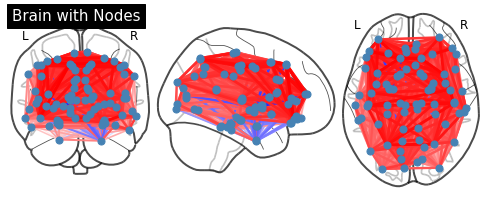

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.connectome import ConnectivityMeasure

# Visualització en 3D cerebral amb representació dels nodes.
plotting.plot_connectome(
    adjacency_matrix=adjacency_matrix,
    node_coords=node_coordinates,
    node_color='steelblue',
    title='Brain with Nodes',
    display_mode='ortho',
    annotate=True,
)
plt.show()